<a href="https://colab.research.google.com/github/KaledGoatache/surge-pricing-simulation/blob/main/0SurgePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dynamic Pricing Algorithm**

---

This notebook simulates a surge pricing algorithm where prices dynamically adjust based on demand and capacity constraints. The goal is to understand how dynamic pricing can maximize revenue and approach the optimal price equilibrium. <br>
**NB: Inspired in a taxi service pricing, capacity and demand for each of the 20 hour periods**
 <br> <br>
 **Key takeaways**
 <br> From an economic analysis point of view :<br>
- When **demand exceeds capacity**, price and marginal cost rise thus surge pricing occurs.
- Profit margin does not always increase because congestion raises costs .
- Optimal alpha (α) balances responsiveness with stability.
- The firm faces diminishing returns when capacity is fully used.

Author : Kaled Goatache

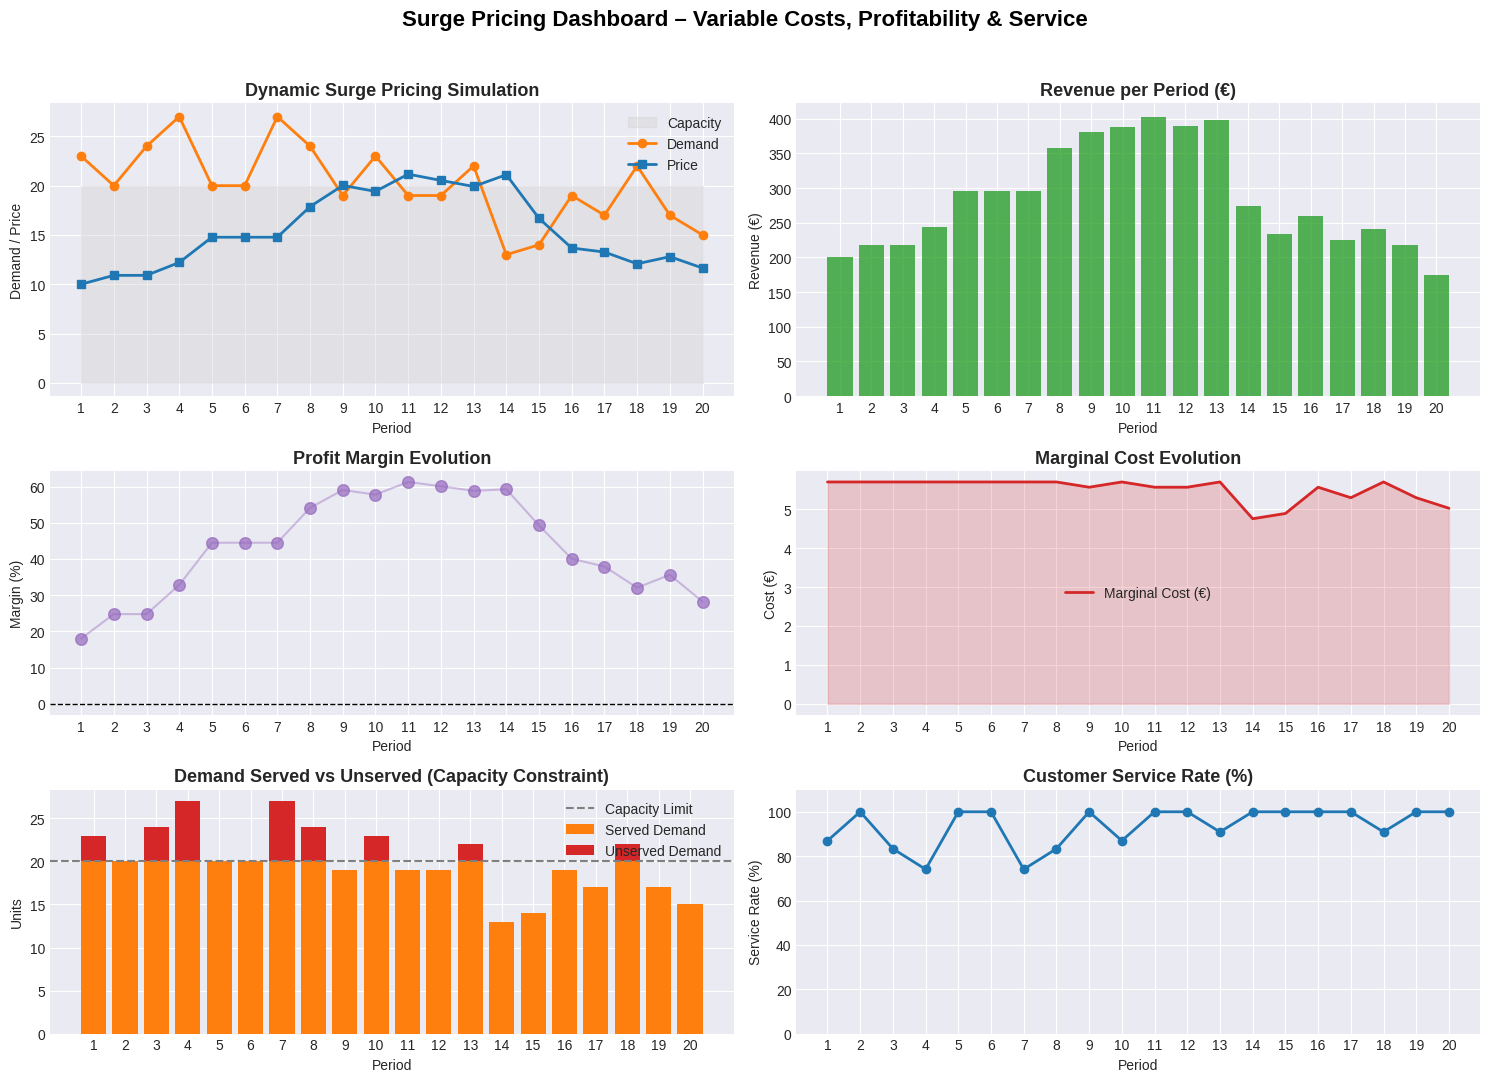

=== Simulation Summary ===
Average Price: 15.42 €
Average Demand: 20.20
Average Utilization: 93.0%
Average Profit Margin: 43.37%
Average Service Rate: 93.5%
Max Revenue: 402.15 € at period 11
Max Profit Margin: 61.27% at period 11


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Parameters ---
# np.random.seed(42) # M. Poudou, you can quit this line of comment to stay with a single output (to try around modifiers for example)

periods = 20
capacity = 20
price_init = 10
alpha = 0.6  # this modifier regulates the sensitivity of price adjustment

# --- Demand parameters ---
mean_demand = 21
std_demand = 4

# --- Cost parameters ---
fixed_cost = 50
base_variable_cost = 3
beta_congestion = 0.9 # this modifier adjust the marginal cost depending on the capacity (it gets more expensive to serve a customer as the system gets busier)

# --- Containers ---
prices = [price_init]
demands, served_demands, unserved_demands = [], [], []
revenues, profits, margins, variable_costs, utilizations = [], [], [], [], []

# --- Simulation ---
for t in range(periods):
    demand = max(0, np.random.normal(mean_demand, std_demand))
    demand = int(round(demand))
    price = prices[-1]
    sold = min(demand, capacity)
    unserved = max(demand - capacity, 0)

    utilization = sold / capacity
    marginal_cost = base_variable_cost * (1 + beta_congestion * utilization)
    total_variable_cost = marginal_cost * sold
    total_cost = fixed_cost + total_variable_cost

    revenue = price * sold
    profit = revenue - total_cost
    margin = (profit / revenue) * 100 if revenue > 0 else 0

    price_new = price * (1 + alpha * (demand / capacity - 1))

    # Store
    demands.append(demand)
    served_demands.append(sold)
    unserved_demands.append(unserved)
    revenues.append(revenue)
    profits.append(profit)
    margins.append(margin)
    variable_costs.append(marginal_cost)
    utilizations.append(utilization)
    prices.append(price_new)

# --- DataFrame for plotting ---
df = pd.DataFrame({
    "Period": np.arange(1, periods + 1),
    "Price": prices[:-1],
    "Demand": demands,
    "Served Demand": served_demands,
    "Unserved Demand": unserved_demands,
    "Capacity": [capacity] * periods,
    "Revenue": revenues,
    "Profit Margin": margins,
    "Marginal Cost": variable_costs,
    "Utilization": utilizations
})
df["Service Rate (%)"] = (df["Served Demand"] / df["Demand"]) * 100

plt.style.use('seaborn-v0_8-darkgrid')

# --- Dashboard Layout ---
fig = plt.figure(figsize=(15, 11))
gs = fig.add_gridspec(3, 2, height_ratios=[1.2, 1, 1])

# (1) Price vs Demand vs Capacity
ax1 = fig.add_subplot(gs[0, 0])
ax1.fill_between(df["Period"], df["Capacity"], color="lightgray", alpha=0.4, label="Capacity")
ax1.plot(df["Period"], df["Demand"], label="Demand", color="tab:orange", linewidth=2, marker="o")
ax1.plot(df["Period"], df["Price"], label="Price", color="tab:blue", linewidth=2, marker="s")
ax1.set_title("Dynamic Surge Pricing Simulation", fontsize=13, weight='bold')
ax1.set_xlabel("Period")
ax1.set_ylabel("Demand / Price")
ax1.legend(loc="upper right")
ax1.set_xticks(df["Period"])

# (2) Revenue (Bar Chart)
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(df["Period"], df["Revenue"], color="tab:green", alpha=0.8)
ax2.set_title("Revenue per Period (€)", fontsize=13, weight='bold')
ax2.set_xlabel("Period")
ax2.set_ylabel("Revenue (€)")
ax2.set_xticks(df["Period"])

# (3) Profit Margin
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(df["Period"], df["Profit Margin"], color="tab:purple", s=70, alpha=0.7)
ax3.plot(df["Period"], df["Profit Margin"], color="tab:purple", alpha=0.4)
ax3.axhline(y=0, color="black", linestyle="--", linewidth=1)
ax3.set_title("Profit Margin Evolution", fontsize=13, weight='bold')
ax3.set_xlabel("Period")
ax3.set_ylabel("Margin (%)")
ax3.set_xticks(df["Period"])

# (4) Marginal Cost
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(df["Period"], df["Marginal Cost"], color="tab:red", linewidth=2, label="Marginal Cost (€)")
ax4.fill_between(df["Period"], df["Marginal Cost"], color="tab:red", alpha=0.2)
ax4.set_title("Marginal Cost Evolution", fontsize=13, weight='bold')
ax4.set_xlabel("Period")
ax4.set_ylabel("Cost (€)")
ax4.legend()
ax4.set_xticks(df["Period"])

# (5) Served vs Unserved Demand
ax5 = fig.add_subplot(gs[2, 0])
ax5.bar(df["Period"], df["Served Demand"], color="tab:orange", label="Served Demand")
ax5.bar(df["Period"], df["Unserved Demand"], bottom=df["Served Demand"], color="tab:red", label="Unserved Demand")
ax5.axhline(y=capacity, color="gray", linestyle="--", label="Capacity Limit")
ax5.set_title("Demand Served vs Unserved (Capacity Constraint)", fontsize=13, weight='bold')
ax5.set_xlabel("Period")
ax5.set_ylabel("Units")
ax5.legend()
ax5.set_xticks(df["Period"])

# (6) Service Rate
ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(df["Period"], df["Service Rate (%)"], marker='o', color='tab:blue', linewidth=2)
ax6.set_title("Customer Service Rate (%)", fontsize=13, weight='bold')
ax6.set_xlabel("Period")
ax6.set_ylabel("Service Rate (%)")
ax6.set_ylim(0, 110)
ax6.set_xticks(df["Period"])
ax6.grid(True)

plt.suptitle("Surge Pricing Dashboard – Variable Costs, Profitability & Service", fontsize=16, weight='bold', color="black")
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Fix x-axis ticks for all subplots
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xticks(df["Period"])
    ax.set_xticklabels(df["Period"], rotation=0)

plt.show()

# --- Summary ---
print("=== Simulation Summary ===")
print(f"Average Price: {np.mean(df['Price']):.2f} €")
print(f"Average Demand: {np.mean(df['Demand']):.2f}")
print(f"Average Utilization: {np.mean(df['Utilization'])*100:.1f}%")
print(f"Average Profit Margin: {np.mean(df['Profit Margin']):.2f}%")
print(f"Average Service Rate: {np.mean(df['Service Rate (%)']):.1f}%")
print(f"Max Revenue: {np.max(df['Revenue']):.2f} € at period {np.argmax(df['Revenue'])+1}")
print(f"Max Profit Margin: {np.max(df['Profit Margin']):.2f}% at period {np.argmax(df['Profit Margin'])+1}")

In [ ]:
df = pd.DataFrame({
    "Period": np.arange(1, periods + 1),
    "Price": prices[:-1],
    "Demand": demands,
    "Revenue": revenues,
    "Profit (€)": profits,
    "Profit Margin (%)": margins,
    "Marginal Cost (€)": variable_costs

}).round(2)

display(df)

,Period,Price,Demand,Revenue,Profit (€),Profit Margin (%),Marginal Cost (€)
0,1,10.00,23,200.00,36.00,18.00,5.70
1,2,10.90,20,218.00,54.00,24.77,5.70
2,3,10.90,24,218.00,54.00,24.77,5.70
3,4,12.21,27,244.16,80.16,32.83,5.70
4,5,14.77,20,295.43,131.43,44.49,5.70
5,6,14.77,20,295.43,131.43,44.49,5.70
6,7,14.77,27,295.43,131.43,44.49,5.70
7,8,17.87,24,357.47,193.47,54.12,5.70
8,9,20.02,19,380.35,224.62,59.06,5.56
9,10,19.42,23,388.36,224.36,57.77,5.70
